<h2><b><font color="green">Task I</font></b></h2>
<h1><i><b><font color="purple">Distance Bucket</font></b></i></h1>

Importing the necessary Python libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.preprocessing import MinMaxScaler
filterwarnings('ignore')

I have downloaded the Google Sheets data as a CSV file, and now I am going to upload it here in Jupyter Notebook using the Pandas library:

In [2]:
Distance_Buckets = pd.read_csv(r'C:\Users\ECC\Hiring Tasks\1. SnappBox! Pricing Data Analyst Hiring Task - Distance Bucket.csv')
Distance_Buckets.drop(34, inplace=True)
Distance_Buckets.rename(
    columns={
        ' Offered-Order / Created-Order %':'Offered-Order / Created-Order %',
        'Accepted-Order / Offered-Order%':'Accepted-Order / Offered-Order %',
        'Fullfillment Rate%':'Fullfillment Rate %'
    }, inplace=True
)

In [3]:
Distance_Buckets.head()

,City,Service Type,Created Date,Distance Buckets(KM),Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,Accepted-Order / Offered-Order %,Fullfillment Rate %,Average Ride Fare
0,A,1.0,6/22/2022,0-1,763,737,611,507,53485000,97%,83%,66%,"105,493"
1,A,1.0,6/22/2022,1-2,1358,1330,1090,933,100400000,98%,82%,69%,"107,610"
2,A,1.0,6/22/2022,2-3,1094,1062,883,779,102060000,97%,83%,71%,"131,014"
3,A,1.0,6/22/2022,3-4,938,916,737,628,89610000,98%,80%,67%,"142,691"
4,A,1.0,6/22/2022,4-5,1060,1036,713,609,95235000,98%,69%,57%,"156,379"


Let's start by examining fundamental details regarding the features and their respective data types. We'll assess whether any data cleansing or adjustments are necessary:

In [4]:
Distance_Buckets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   City                              34 non-null     object 
 1   Service Type                      34 non-null     float64
 2   Created Date                      34 non-null     object 
 3   Distance Buckets(KM)              34 non-null     object 
 4   Request                           34 non-null     int64  
 5   Offered Requests                  34 non-null     int64  
 6   Accepted Requests                 34 non-null     int64  
 7   Ride                              34 non-null     int64  
 8   Total Ride Fare(GMV)(IRR)         34 non-null     int64  
 9   Offered-Order / Created-Order %   34 non-null     object 
 10  Accepted-Order / Offered-Order %  34 non-null     object 
 11  Fullfillment Rate %               34 non-null     object 
 12  Average Ri

In [5]:
Distance_Buckets['Created Date'] = pd.to_datetime(Distance_Buckets['Created Date'], format='%m/%d/%Y')

for col in Distance_Buckets.columns:
    if '%' in col:
        Distance_Buckets[col] = Distance_Buckets[col].str.rstrip('%').astype(float) / 100

Distance_Buckets['Average Ride Fare'] = Distance_Buckets['Average Ride Fare'].apply(lambda n:int(n.replace(',','')))

In [6]:
Distance_Buckets.dtypes

City                                        object
Service Type                               float64
Created Date                        datetime64[ns]
Distance Buckets(KM)                        object
Request                                      int64
Offered Requests                             int64
Accepted Requests                            int64
Ride                                         int64
Total Ride Fare(GMV)(IRR)                    int64
Offered-Order / Created-Order %            float64
Accepted-Order / Offered-Order %           float64
Fullfillment Rate %                        float64
Average Ride Fare                            int64
dtype: object

Next, we'll kick off our analysis by using the .describe() method. This will provide us with an initial glimpse into the available data:

In [7]:
Distance_Buckets.describe()

,Service Type,Request,Offered Requests,Accepted Requests,Ride,Total Ride Fare(GMV)(IRR),Offered-Order / Created-Order %,Accepted-Order / Offered-Order %,Fullfillment Rate %,Average Ride Fare
count,34.0,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000
mean,1.0,420.735294,406.294118,270.352941,223.911765,3.828559e+07,0.944118,0.659412,0.448235,300504.147059
std,0.0,470.853275,458.983563,331.082237,282.116607,4.213199e+07,0.073035,0.172222,0.129298,138567.501114
min,1.0,2.000000,2.000000,2.000000,1.000000,3.000000e+05,0.710000,0.360000,0.250000,105493.000000
25%,1.0,11.000000,10.000000,5.250000,4.250000,1.403750e+06,0.932500,0.532500,0.352500,199362.750000
50%,1.0,152.000000,142.500000,69.500000,53.000000,1.510750e+07,0.970000,0.650000,0.405000,284959.000000
75%,1.0,897.750000,870.500000,589.000000,473.500000,8.230375e+07,0.995000,0.800000,0.542500,352500.000000
max,1.0,1358.000000,1330.000000,1090.000000,933.000000,1.127250e+08,1.000000,1.000000,0.710000,647500.000000


To embark on our quest of analysing the pricing in this city and devising strategies to boost ride numbers, our first step involves identifying the key factors that wield the most influence over the <i><b><font color="darkblue">Ride</font></b></i> counts.

Evidently, the <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i> variable takes center stage here. As we observe an upward trend in <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i>, we concurrently witness a decline in metrics like <i><b><font color="darkblue">Request</font></b></i>, <i><b><font color="darkblue">Offered Requests</font></b></i>, <i><b><font color="darkblue">Accepted Requests</font></b></i>, and subsequently, the count of actual <i><b><font color="darkblue">Rides</font></b></i>.

* We should delve into the <b>relationship between the growth in</b> <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i> and <b>the corresponding shifts</b> in both the initial request count (column <i><b><font color="darkblue">Request</font></b></i>) and the total <i><b><font color="darkblue">Rides</font></b></i> count:

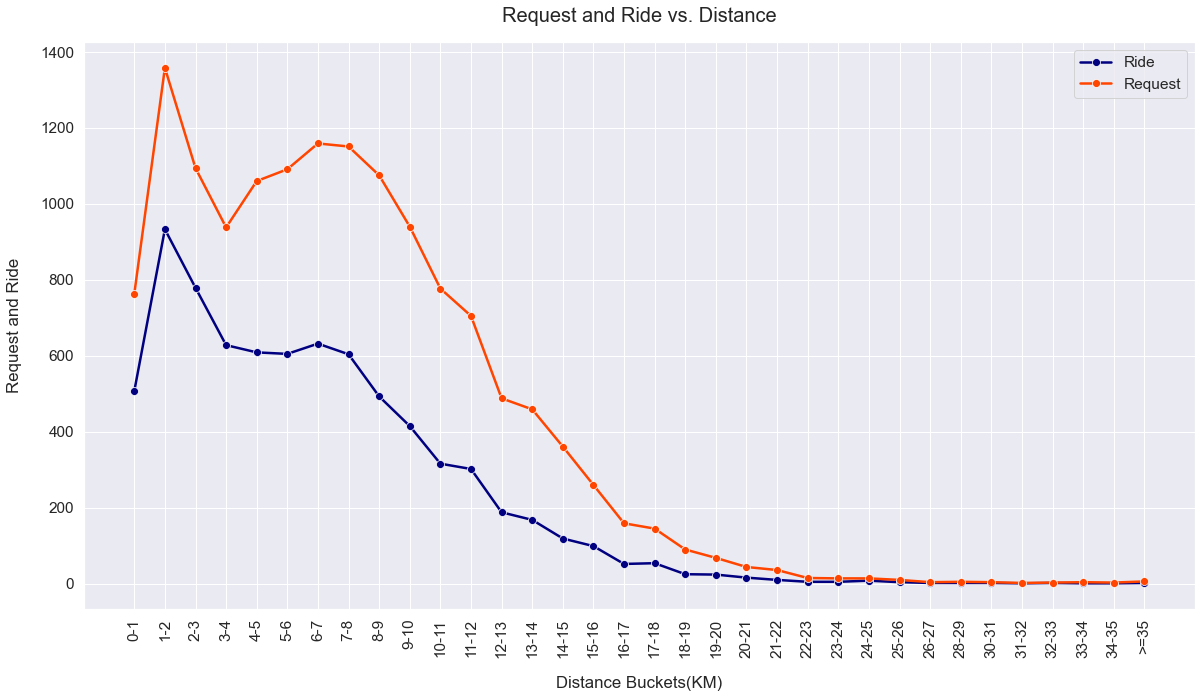

In [25]:
plt.figure(figsize=(17, 10))
sns.set(font_scale = 1.4, style="darkgrid")

sns.lineplot(
    x='Distance Buckets(KM)', y='Ride', data=Distance_Buckets, color='navy',
    label='Ride', marker='o', markersize=8, linewidth=2.5
)
sns.lineplot(
    x='Distance Buckets(KM)', y='Request', data=Distance_Buckets, color='orangered',
    label='Request', marker='o', markersize=8, linewidth=2.5
)
plt.xticks(rotation=90)
plt.xlabel('Distance Buckets(KM)', labelpad=18)
plt.ylabel('Request and Ride', labelpad=18)
plt.title('Request and Ride vs. Distance', fontsize=20, pad=20)

plt.tight_layout()
plt.show()

* Observing the line plot provided, a distinct disparity appears between the initial <i><b><font color="darkblue">Request</font></b></i> volume and the ensuing <i><b><font color="darkblue">Ride</font></b></i> count. <u>Particularly within the 4 KM to 12 KM range, this variance exceeds <b>400</b></u>. This discrepancy could stem from <u><b><font color="darkred">either customers canceling their initial requests</font></b> or <b><font color="darkred">bikers declining offered requests</font></b></u>. In either case, <b>pricing</b> emerges as a pivotal determinant in this scenario.

In order to decipher the root cause behind the apparent divergence between the initial <i><b><font color="darkblue">Request</font></b></i> volume and the subsequent <i><b><font color="darkblue">Ride</font></b></i> count, <u>a dual investigation into both customer and biker behavior is crucial.</u> To accomplish this, we'll visualize the <i><b><font color="darkblue">Accepted-Order / Offered-Order %</font></b></i> ratio to gauge <u>biker engagement</u>, while also assessing the <i><b><font color="darkblue">Offered-Order / Created-Order %</font></b></i> ratio to gain insights into <u>customers' actions</u> across varying <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i>:

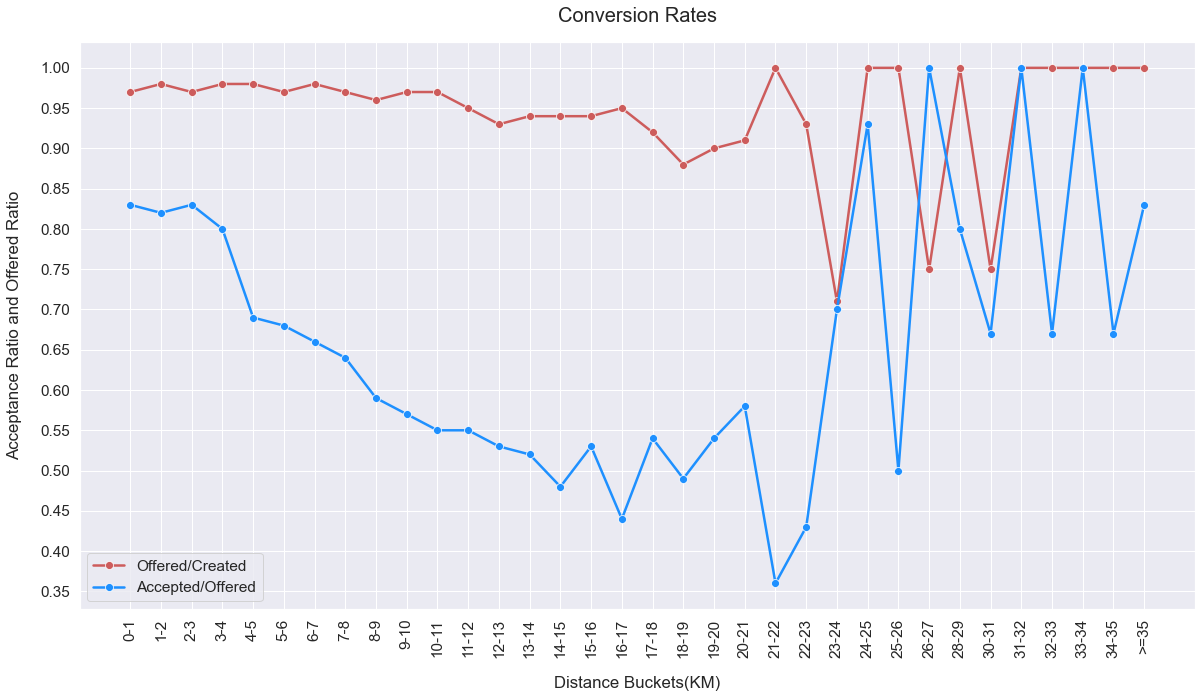

In [32]:
plt.figure(figsize=(17, 10))
sns.set(font_scale = 1.4, style="darkgrid")

sns.lineplot(
    x='Distance Buckets(KM)', y='Offered-Order / Created-Order %', data=Distance_Buckets,
    color='indianred', label='Offered/Created', marker='o', markersize=8, linewidth=2.5
)
sns.lineplot(
    x='Distance Buckets(KM)', y='Accepted-Order / Offered-Order %', data=Distance_Buckets,
    color='dodgerblue', label='Accepted/Offered', marker='o', markersize=8, linewidth=2.5
)

plt.xticks(rotation=90)
plt.xlabel('Distance Buckets(KM)', labelpad=18)
plt.yticks(np.arange(0.35,1.05,0.05))
plt.ylabel('Acceptance Ratio and Offered Ratio', labelpad=18)
plt.title('Conversion Rates', fontsize=20, pad=20)

plt.tight_layout()
plt.show()

* <u><i>Across the majority of the plot</i></u>, it's the <i><b><font color="darkblue">Accepted-Order / Offered-Order %</font></b></i> ratio that exhibits pronounced variations. Particularly noteworthy is <b><font color="red">the continuous decline in acceptance rate within the 3 KM to 15 KM range, characterized by a distinct negative slope.</font></b> Conversely, the <i><b><font color="darkblue">Offered-Order/Created-Order %</font></b></i> ratio displays <u><i>relatively minor shifts.</i></u> This suggests a scenario where <b><span style="background-color: yellow">customers appear content with the pricing, while bikers seem less inclined to embrace the offers presented.</span></b> <br></br>

* <u><i>For distances exceeding 15 KM,</i></u> the trajectory of the <i><b><font color="darkblue">Accepted-Order / Offered-Order %</font></b></i> ratio is characterized by <b><font color="green">an overall upward trend</font></b>, <b><span style="background-color: yellow">indicating heightened biker interest in the offers.</span></b> <br></br>

* However, <u><i>after the 21 KM mark</i></u>, rapid and substantial changes display in both ratios. Notably, <font color="darkblue">across several distances, the movement of these ratios diverges,</font> <b><span style="background-color: yellow">potentially indicating a dynamic wherein elevated prices in longer-distance deliveries make the offers more appealing to bikers, yet a substantial portion of customers withhold from placing orders due to the increased costs.</span></b>

To gain insights into <u>how varying price changes across different <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i> impact both <b>biker</b> and <b>customer</b> behavior, we'll introduce <i><b><font color="darkblue">Average Ride Fare</font></b></i> to the existing <b>"Conversion Rates"</b> plot.</u> However, it's important to acknowledge that the scale of <i><b><font color="darkblue">Average Ride Fare</font></b></i> significantly differs from <i><b><font color="darkblue">Accepted-Order / Offered-Order %</font></b></i> and <i><b><font color="darkblue">Offered-Order / Created-Order %</font></b></i>. To address this, we'll employ the <u><b>Min-Max Scaling technique</b></u>, which will normalize the average fare values between 0 and 1. It's worth noting that a <u><i><b><font color="darkblue">Average Ride Fare</font></b></i> of zero signifies the lowest price, while a value of one represents the highest average price.</u> The objective of incorporating the Scaled <i><b><font color="darkblue">Average Ride Fare</font></b></i> into the plot is solely to glean insights into <b><span style="background-color: yellow">how pricing adjustments may influence the aforementioned ratios, thus evaluating the effectiveness of the pricing strategy:</span></b>

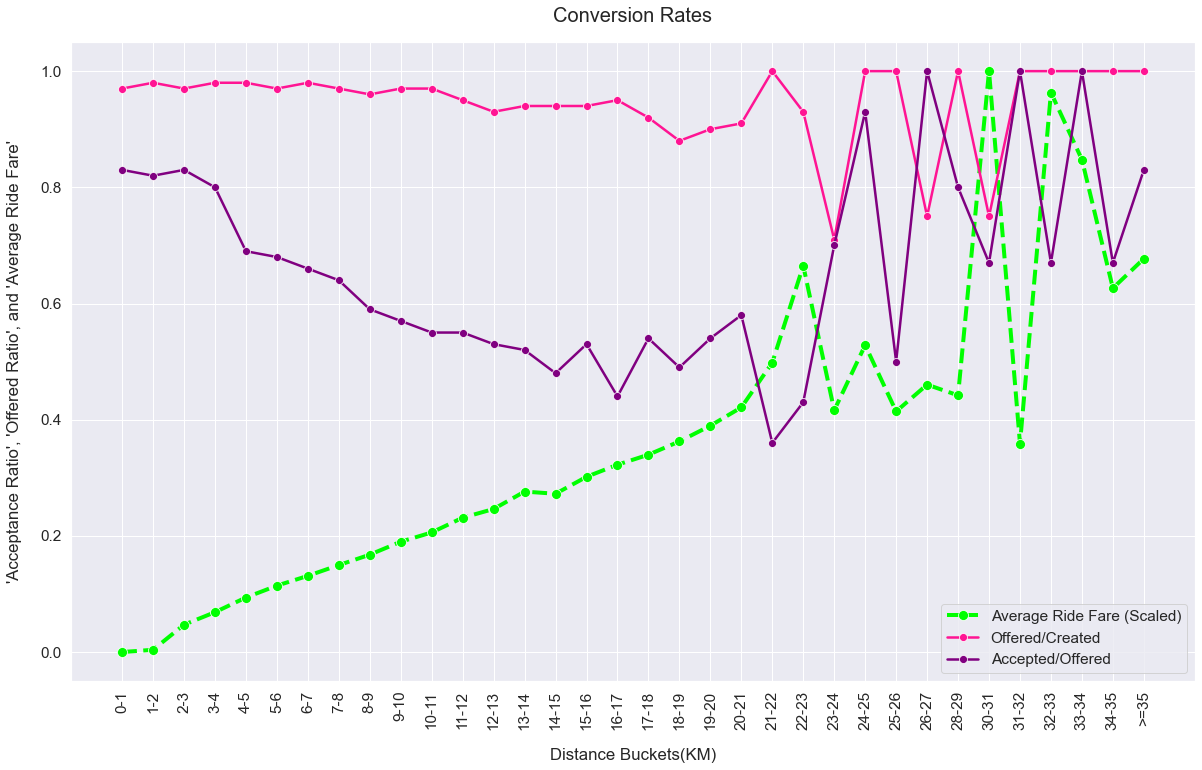

In [68]:
plt.figure(figsize=(17, 11))
sns.set(font_scale = 1.4, style="darkgrid")

sns.lineplot(
    x=Distance_Buckets['Distance Buckets(KM)'],
    y=np.ravel(MinMaxScaler().fit_transform(Distance_Buckets[['Average Ride Fare']])),
    color='lime', label='Average Ride Fare (Scaled)', marker='o',
    markersize=10, linewidth=4, linestyle='dashed'
)
sns.lineplot(
    x='Distance Buckets(KM)', y='Offered-Order / Created-Order %', data=Distance_Buckets,
    color='deeppink', label='Offered/Created', marker='o', markersize=8, linewidth=2.5
)
sns.lineplot(
    x='Distance Buckets(KM)', y='Accepted-Order / Offered-Order %', data=Distance_Buckets,
    color='purple', label='Accepted/Offered', marker='o', markersize=8, linewidth=2.5
)

plt.xticks(rotation=90)
plt.xlabel('Distance Buckets(KM)', labelpad=18)
plt.ylabel("'Acceptance Ratio', 'Offered Ratio', and 'Average Ride Fare'", labelpad=18)
plt.title('Conversion Rates', fontsize=20, pad=20)

plt.tight_layout()
plt.show()

In [100]:
Conversion_Rate = Distance_Buckets[
    ['Distance Buckets(KM)','Offered-Order / Created-Order %','Accepted-Order / Offered-Order %','Average Ride Fare']
]

Conversion_Rate['Offered_rate_change']=np.zeros(Conversion_Rate.shape[0])
Conversion_Rate['Acceptance_rate_change']=np.zeros(Conversion_Rate.shape[0])
Conversion_Rate['Price_rate_change']=np.zeros(Conversion_Rate.shape[0])

for idx in list(Conversion_Rate.index)[1:]:
    if (Conversion_Rate.loc[idx,'Offered-Order / Created-Order %']-Conversion_Rate.loc[idx-1,'Offered-Order / Created-Order %'])>0:
        Conversion_Rate.loc[idx, 'Offered_rate_change']='Upp'
    elif (Conversion_Rate.loc[idx,'Offered-Order / Created-Order %']-Conversion_Rate.loc[idx-1,'Offered-Order / Created-Order %'])<0:
        Conversion_Rate.loc[idx, 'Offered_rate_change']='Down'
        
for idx in list(Conversion_Rate.index)[1:]:
    if (Conversion_Rate.loc[idx,'Accepted-Order / Offered-Order %']-Conversion_Rate.loc[idx-1,'Accepted-Order / Offered-Order %'])>0:
        Conversion_Rate.loc[idx, 'Acceptance_rate_change']='Upp'
    elif (Conversion_Rate.loc[idx,'Accepted-Order / Offered-Order %']-Conversion_Rate.loc[idx-1,'Accepted-Order / Offered-Order %'])<0:
        Conversion_Rate.loc[idx, 'Acceptance_rate_change']='Down'
        
for idx in list(Conversion_Rate.index)[1:]:
    if (Conversion_Rate.loc[idx,'Average Ride Fare']-Conversion_Rate.loc[idx-1,'Average Ride Fare'])>0:
        Conversion_Rate.loc[idx, 'Price_rate_change']='Upp'
    elif (Conversion_Rate.loc[idx,'Average Ride Fare']-Conversion_Rate.loc[idx-1,'Average Ride Fare'])<0:
        Conversion_Rate.loc[idx, 'Price_rate_change']='Down'

These are the <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i> points where <i><b><font color="darkblue">Accepted-Order / Offered-Order %</font></b></i> dropped down while <i><b><font color="darkblue">Offered-Order / Created-Order %</font></b></i> was rising, which implies that while customers were satisfied with the price of the shipping, bikers did not find the offer attractive:

(The only exception is <mark>'Distance Buckets(KM)' = '28-29'</mark>, where the price has risen but the acceptance rate decreased)

In [102]:
Conversion_Rate[(Conversion_Rate.Offered_rate_change=='Upp')&(Conversion_Rate.Acceptance_rate_change=='Down')]

,Distance Buckets(KM),Offered-Order / Created-Order %,Accepted-Order / Offered-Order %,Average Ride Fare,Offered_rate_change,Acceptance_rate_change,Price_rate_change
1,1-2,0.98,0.82,107610,Upp,Down,Upp
3,3-4,0.98,0.80,142691,Upp,Down,Upp
6,6-7,0.98,0.66,176598,Upp,Down,Upp
9,9-10,0.97,0.57,208434,Upp,Down,Upp
13,13-14,0.94,0.52,255208,Upp,Down,Upp
16,16-17,0.95,0.44,280288,Upp,Down,Upp
21,21-22,1.00,0.36,375500,Upp,Down,Upp
27,28-29,1.00,0.80,345000,Upp,Down,Down


These are the <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i> points where <i><b><font color="darkblue">Offered-Order / Created-Order %</font></b></i> dropped down while <i><b><font color="darkblue">Accepted-Order / Offered-Order %</font></b></i> was rising, which implies that while Bikers were satisfied with the price of the shipping, Customers have found it too expensive:

(The only exception is <mark>'Distance Buckets(KM)' = '23-24'</mark>, where the price has fallen but the Offered-Order rate has also decreased)

In [103]:
Conversion_Rate[(Conversion_Rate.Offered_rate_change=='Down')&(Conversion_Rate.Acceptance_rate_change=='Upp')]

,Distance Buckets(KM),Offered-Order / Created-Order %,Accepted-Order / Offered-Order %,Average Ride Fare,Offered_rate_change,Acceptance_rate_change,Price_rate_change
2,2-3,0.97,0.83,131014,Down,Upp,Upp
17,17-18,0.92,0.54,289630,Down,Upp,Upp
22,22-23,0.93,0.43,466000,Down,Upp,Upp
23,23-24,0.71,0.70,331000,Down,Upp,Down
26,26-27,0.75,1.00,355000,Down,Upp,Upp


<h2><b><font color="darkviolet">Suggestions:</font></b></h2>

Obviously, this data pertains to city A and specifically for Service Type 1, covering only a single day. Therefore, the conclusions drawn above might not hold true consistently over an extended time period.

With that said, <u>the pricing strategy encounters challenges in the two scenarios mentioned.</u> To address these challenges, I propose the following suggestions for each scenario:
<ul>
    <li><b>1.</b> <i><b><font color="darkblue"><font color="red">Decrease</font> in "Accepted-Order / Offered-Order %" while <font color="green">Increase</font> in "Offered-Order / Created-Order %":</font></b></i> <br></br>
    This situation arises when customers are content with the shipping price, but bikers do not find the offer appealing. In such cases, a straightforward increase in prices may seem reasonable, but it must be approached cautiously to avoid customer attrition. <b><font color="purple">A potential solution is to implement a balanced approach by slightly raising prices while introducing limited-time bonuses. For instance, reducing the company's commission from the ride price in favor of bikers could incentivize their participation. This strategy warrants exploration.</font></b></li><br></br>
    <li><b>2.</b> <i><b><font color="darkblue"><font color="green">Increase</font> in "Accepted-Order / Offered-Order %" while <font color="red">Decrease</font> in "Offered-Order / Created-Order %":</font></b></i> <br></br>
    This situation arises when bikers are satisfied with the offered price, yet customers perceive it as overly expensive, leading them to refrain from placing orders. <u>In shorter <i><b><font color="darkblue">Distance Buckets(KM)</font></b></i>, the reduction in <i><b><font color="darkblue">Offered-Order / Created-Order %</font></b></i> is not substantial enough to warrant immediate changes to the pricing strategy.</u> However, <b><font color="purple">for longer distances, particularly those surpassing 22 km, a slight price decrease could prove attractive to customers. It's crucial to strike a balance, ensuring that bikers' interest remains intact. One approach is to introduce limited-time bonuses, such as lowering the company's commission from the ride price in favor of bikers.</font></b> This initiative serves to maintain bikers' engagement while appealing to cost-conscious customers.</li><br></br>
    <li><b>3.</b> <i><b><font color="darkblue">Dynamic Pricing:</font></b></i> <br></br>
    Implementing dynamic pricing strategies that adjust fares based on factors such as demand, distance, and time of day, and lowering prices during periods of low demand while increasing them during peak times, are well-proven strategies.</li>
</ul>